In [1]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd


In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [4]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [17]:
import win32api as wp
path = wp.GetShortPathName('C:/Users/marce/Documents/interpromo_2020/AllData/SEATGURU_INFO_AIRCRAFT.csv')

In [18]:
data = pd.read_csv(path)
df = pd.DataFrame.from_csv(path, encoding='utf-8', sep=";")
dfetud = df[6000:7000]

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [5]:
dfetud['Aircraft_Type'] = (dfetud['Aircraft_Type'].str.replace(r' ', '_'))

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
dfetud['nom'] = dfetud['Airline_name'].str.cat(dfetud['Aircraft_Type'],sep="_")

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
list__type = dfetud['nom'].unique()

In [9]:
import os
listeall=os.listdir('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU')

In [31]:
# list comparator
import re
results = []
for x in list__type :
    pattern = re.compile("x")
for texte in listeall :
     if pattern.search(texte) :
        results.append(texte)
results = list(set(results))

['AeroMexico_Boeing_737-700_V2_plane21.jpg',
 'Hainan_Airlines_Boeing_737_Max_8_plane473.svg.png',
 'Sunwing_Airlines_Boeing_737_Max_8_plane877.svg.png',
 'AeroMexico_Boeing_737-800_B_plane22.svg.png',
 'AeroMexico_Embraer_ERJ-170_plane24.jpg',
 'Norwegian_Air_Shuttle_Boeing_737_Max_8_plane678.svg.png',
 'Southwest_Airlines_Boeing_737_Max_8_plane851.svg.png',
 'WestJet_Boeing_737_Max_8_plane334.svg.png',
 'Qatar_Airways_Airbus_A321_182pax_plane747.svg.png',
 'Icelandair_Boeing_737_Max_8_plane505.svg.png',
 'AeroMexico_Boeing_737-800_C_plane23.jpg',
 'AeroMexico_Boeing_787-9_plane19.jpg',
 'Iberia_Airbus_A320_Express_plane497.jpg',
 'American_Airlines_Boeing_737_Max_8_plane177.svg.png',
 'Regional_Express_SAAB_340B_plane749.jpg',
 'Air_India_Express_Boeing_737-800_V2_plane104.jpg',
 'AeroMexio_Boeing_787-8_plane18.jpg',
 'AeroMexico_Embraer_ERJ-190_plane25.jpg',
 'Qatar_Airways_Airbus_A321_196pax_plane748.svg.png',
 'Aeromexico_AM_Boeing_737_MAX_8_plane20.svg.png',
 'SilkAir_Boeing_737_

In [22]:
# pattern matching - jet 1
import numpy as np
import cv2
from matplotlib import pyplot as plt
import win32api as wp
path_im = wp.GetShortPathName('C:/Users/marce/Documents/interpromo 2020/All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_A321_V3_plane11.jpg')

img = cv2.imread(path_im, 0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  
plt.show()

error: (3, 'GetShortPathNameW', 'Le chemin d’accès spécifié est introuvable.')

In [9]:
# simple seats recognition
import cv2
import numpy as np
path_im = wp.GetShortPathName('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg')


img_rgb = cv2.imread(path_im,0)
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# cv2.imshow('first',img_rgb)
# cv2.waitKey(0)
# gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) - si image en couleur.

template = cv2.imread('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/temp_normal_seat.jpg',0)
w, h = template.shape[::-1]
res=cv2.matchTemplate(img_rgb,template,cv2.TM_CCOEFF_NORMED)
sin_val, max_val, min_loc, max_loc=cv2.minMaxLoc(res)
top_left=max_loc
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
# adding +50 to the limits of the rectangle pixels :
# bottom_right=(top_left[0]+50,top_left[1]+50)
# cv2.rectangle(res, top_left, bottom_right, (0,255,0),5)

cv2.imshow('object found',img_rgb)
cv2.waitKey(0)

# Observation : template needs to be , le contour blanc autour du siège dans le template ne permet pas la bonne reconnaissance de l'élément siège sur l'image.

-1

In [8]:
import cv2
import numpy as np

img_rgb = cv2.imread('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg',0)
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
#cv2.imshow('first',img_rgb)
#cv2.waitKey(0)

template = cv2.imread('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/templateTest.jpg',0)
w, h = template.shape[::-1]
res=cv2.matchTemplate(img_rgb,template,cv2.TM_CCOEFF_NORMED)
sin_val, max_val, min_loc, max_loc=cv2.minMaxLoc(res)
top_left=max_loc
threshold = 0.6
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
#on augmente les limites du rectangle de reconnaissance de 50 pixels
#bottom_right=(top_left[0]+40,top_left[1]+40)
#cv2.rectangle(res, top_left, bottom_right, (0,255,0),5)

cv2.imshow('object found',img_rgb)
cv2.waitKey(0)

-1

In [4]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import glob
import cv2
 
# charger le template, convertir en nuances de gris, détecter les bords
template = cv2.imread('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/temp_restau.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
cv2.imshow("Template", template)
cv2.waitKey(0)

-1

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#ça marche pas. l'image n'a pas de CV_8UC3 dans la fonction cv::'grabCut' 
img = cv2.imread('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg')


mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

# newmask is the mask image I manually labelled
newmask = cv2.imread('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/image2.png',0)

mask[newmask == 0] = 1
mask[newmask == 255] = 0

mask, bgdModel, fgdModel = cv2.grabCut(img,mask,None,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()



IndexError: boolean index did not match indexed array along dimension 0; dimension is 1651 but corresponding boolean dimension is 318

In [2]:
#Jour 3 / 08/01/2020
#Essai OpenCV et Mask R-CNN dans les images
import numpy as np
import argparse
import random
import time
import cv2
import os

In [2]:
  construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
ap.add_argument("-m", "--mask-rcnn", required=True,
	help="base path to mask-rcnn directory")
ap.add_argument("-v", "--visualize", type=int, default=0,
	help="whether or not we are going to visualize each instance")
ap.add_argument("-c", "--confidence", type=float, default=0.5,
	help="minimum probability to filter weak detections")
ap.add_argument("-t", "--threshold", type=float, default=0.3,
	help="minimum threshold for pixel-wise mask segmentation")
args = vars(ap.parse_args())

# load the COCO class labels our Mask R-CNN was trained on  #document avec 90 classes. /!\ PAS CLASSES AVEC OBJETS VOULUS.
labelsPath = os.path.sep.join([args["mask_rcnn"],
	"object_detection_classes_coco.txt"])
LABELS = open(labelsPath).read().strip().split("\n")
 
# load the set of colors that will be used when visualizing a given
# instance segmentation
colorsPath = os.path.sep.join([args["mask_rcnn"], "colors.txt"])
COLORS = open(colorsPath).read().strip().split("\n")
COLORS = [np.array(c.split(",")).astype("int") for c in COLORS]
COLORS = np.array(COLORS, dtype="uint8")

#problèmes de bug
#(...) voir https://www.pyimagesearch.com/2018/11/19/mask-r-cnn-with-opencv/

usage: ipykernel_launcher.py [-h] -i IMAGE -m MASK_RCNN [-v VISUALIZE]
                             [-c CONFIDENCE] [-t THRESHOLD]
ipykernel_launcher.py: error: the following arguments are required: -i/--image, -m/--mask-rcnn


SystemExit: 2

C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [27]:
#Essai OpenCV et Image Segmentation with Watershed Algorithm :
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib import image

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = cv.imread('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg')
#cv.IMREAD_grayscale
#gray = cv.cvtColor(imgcopy,cv.COLOR_BGR2GRAY)
gray = rgb2gray(img)
gray = gray.reshape((gray.shape,1))
print(gray.shape)
#imgcopy = img.apply(lambda x : np.uint32(x))  
imgcopy=np.uint32(gray)
#ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
cv2.imshow("Image", thresh) 
cv2.waitKey(0) 

#sur les templates :
#import numpy as np
#import cv2 as cv
#from matplotlib import pyplot as plt
#temp = cv.imread('C:/Users/marce/Documents/ProjetInterpromo2020G8/images/temp_restau.jpg')
#gray = cv.cvtColor(temp,cv.COLOR_BGR2GRAY)
#ret, thresh2 = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

TypeError: 'tuple' object cannot be interpreted as an integer

In [4]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)  
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

In [5]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
cv2.imshow("Image", markers) 
cv2.waitKey(0)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

error: OpenCV(4.1.2) C:/projects/opencv-python/opencv/modules/highgui/src/precomp.hpp:137: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


In [ ]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

In [36]:
import numpy as np
print(np.__version__)

1.18.1


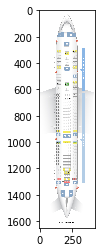

In [64]:
# Use of scikit-image for image segmentation 
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
image_load = plt.imread('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg')
plt.imshow(image_load)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x251bc1240b8>)

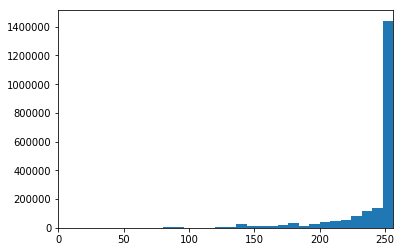

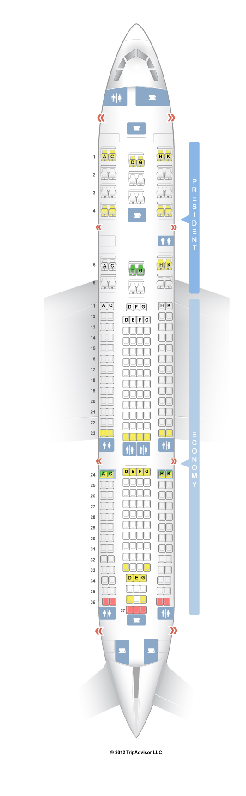

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

# Incompatibility with numpy 1.16.0 => essai avec une version inférieure 
# The latest version of numpy is incompatible with the current scikit-image version.
# ok avec numpy version 1.15.0.

def image_show(im, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

fig, ax = plt.subplots(1, 1)
ax.hist(image.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256)

image_show(im)

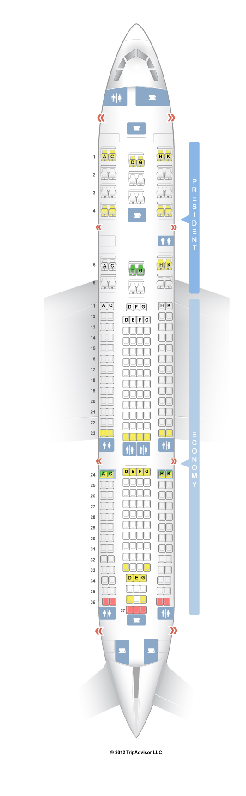

In [60]:
global imthe
imthe = filters.threshold_li(im)  # otsu, li, local
image_show(im < imthe)

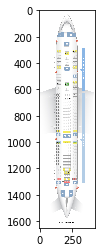

In [65]:
from skimage import io
im2 = io.imread('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg') 
plt.imshow(im2);

In [69]:
import cv2 as cv
img = cv.imread('C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg')
gray = cv.cvtColor(im2,cv.COLOR_BGR2GRAY)
cv2.imshow("Image", gray) 
cv2.waitKey(0) 

-1

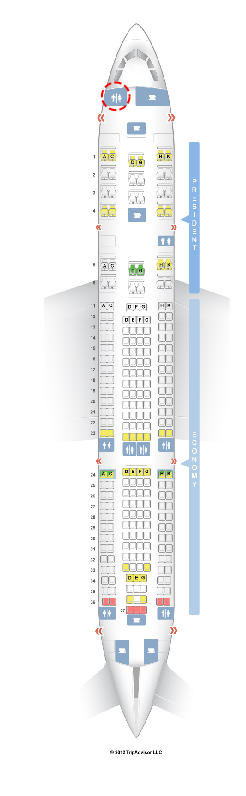

In [115]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(300, [185, 165], 30)[:-1]

fig, ax = image_show(gray)
ax.plot(points[:, 0], points[:, 1], '--r', lw=2)

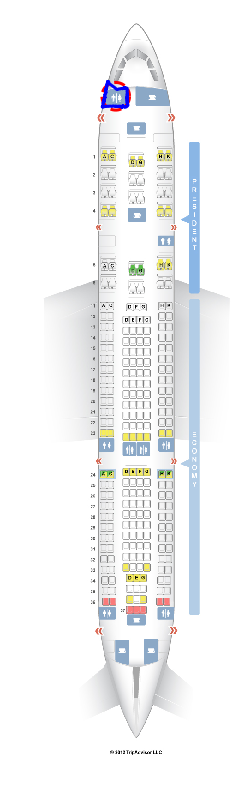

In [116]:
snake = seg.active_contour(gray, points)
fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

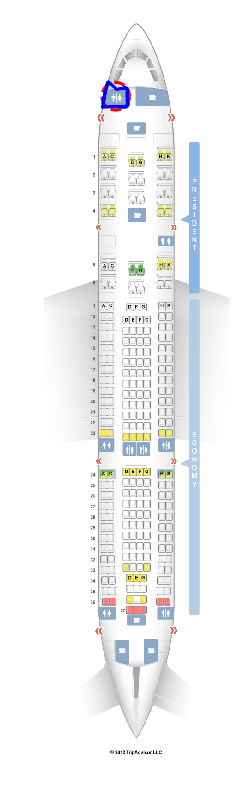

In [117]:
snake = seg.active_contour(gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [108]:
image_labels = np.zeros(gray.shape, dtype=np.uint8)
image_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x251ca9d0470>)

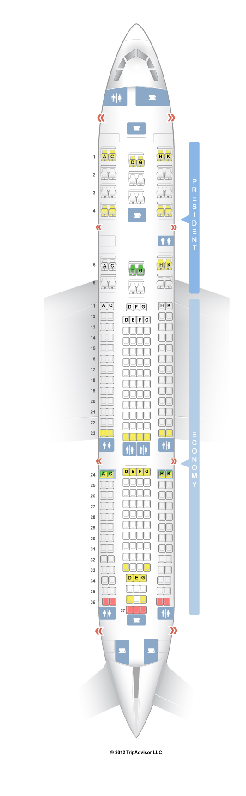

In [109]:
indices = draw.circle_perimeter(187, 165,20)
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels)

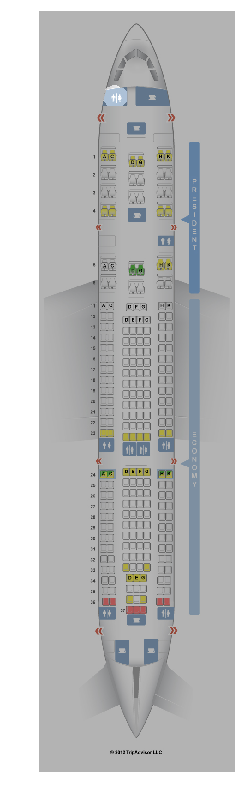

In [110]:
image_segmented = seg.random_walker(gray, image_labels)
# Check our results
fig, ax = image_show(gray)
ax.imshow(image_segmented == 1, alpha=0.3);

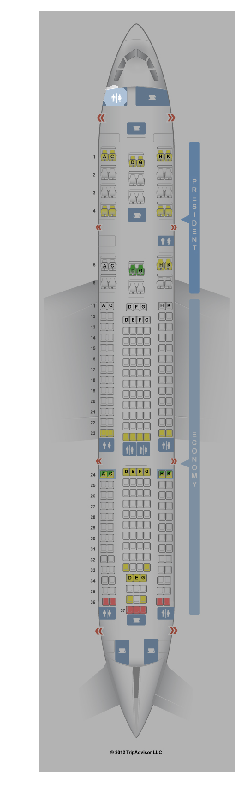

In [111]:
image_segmented = seg.random_walker(gray, image_labels, beta = 3000)
# Check our results
fig, ax = image_show(gray)
ax.imshow(image_segmented == 1, alpha=0.3);

# Reconnaissance de patterns ; Label image regions avec scikit-image et non pas OpenCV /!\ 

In [161]:
#Segmentation avec label image regions - scikit-image et non pas OpenCV
#Segmentation d'une image par labellisation. 

import matplotlib.patches as mpatches
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

#on prend l'image sur laquelle on va appliquer la méthode:
image = plt.imread('C:/Users/marce/Documents/interpromo_2020/Alitalia_Airlines_Boeing_777-200_plane153.jpg')
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray


# import cv2
# img_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

On passe en nuances de gris :
original = image
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
fig.tight_layout()
plt.show()

In [164]:
# On applique un seuil d'étude à partir de la méthode OTSU automatique qui sépare les pixels de l'image en différentes classes en fonction de l'intensité de gris :
# thresh = threshold_otsu(grayscale)
# bw = closing(grayscale > thresh, square(3))
thresh = threshold_otsu(grayscale)
bw = closing(grayscale > thresh, square(3))
# C:\Users\marce\Anaconda3\lib\site-packages\skimage\filters\thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (1657, 425, 3) looks like an RGB image
#   warn(msg.format(image.shape))

C:\Users\marce\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True
C:\Users\marce\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True


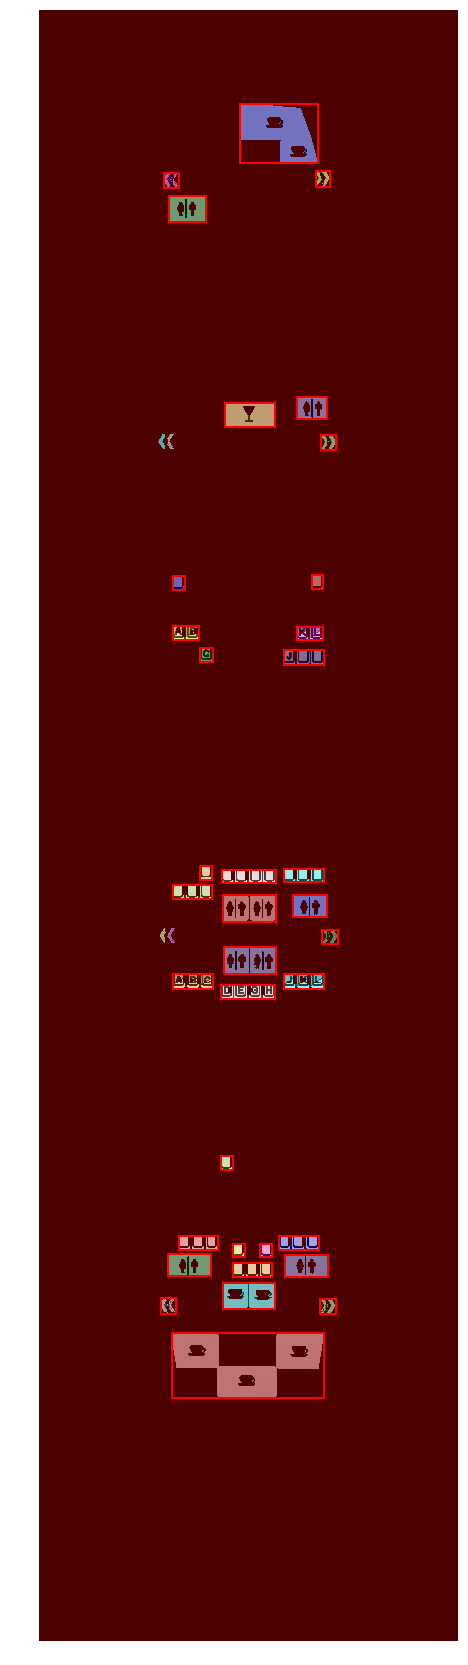

<Figure size 432x288 with 0 Axes>

In [158]:
# suppression artifacts sur les bords de l'image
cleared = clear_border(bw)

# labellisation des régions de l'image
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(80, 30))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # prendre des régions assez grandes 
    if region.area >= 80:
        # dessiner des rectangles autour des régions définies
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.figure()
plt.tight_layout()
plt.show()